<a href="https://colab.research.google.com/github/piltom/widget_sketch_recon/blob/main/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconocimiento de widgets a mano alzada para generar UIs a partir de un borrador
## Big Picture
Este trabajo es una parte de un proyecto más grande, en el cual se intenta generar una descripción de una interfaz de usuario a partir de una foto de un sketch en papel/pizarra. Con esta descripción se puede después generar código para algún lenguaje/framwork en particular (ReactJS, Qt, Gtk, etc.)
Un ejemplo de un par de sketch e interfaz es el siguiente:

![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/ideal_example/sketch1.jpg)
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/ideal_example/final_result1.jpg)


##Este trabajo
En este trabajo, se asume que la imagen original ya fue segmentada en elementos únicos, los cuales deben ser clasificados en categorías. Los elementos posibles por el momento son:

###Checkbox:
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/checkbox.png)
###Input
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/input.png)

###Pushbutton:
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/pushbutton.png)

###Radiobutton:
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/radio1.png)
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/radio2.png)

###Round Image:
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/roundimg.png)

###Square Image:
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/squareimg.png)

###Slider:
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/slider.png)

###Switch:
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/switch1.png)
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/switch2.png)
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/switch3.png)

###Text:
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/text1.png)
![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/sample_elements/text2.png)

#Generación del dataset
El dataset fue dibujado sobre hojas cuadriculadas con lapicera azul, en formato de "sprite sheet" (rectángulos de un mismo tamaño contiguos). El fondo cuadriculado seguramente sea el "peor caso" de ruido de fondo posible, ya que alternativamente podría ser una hoja rayada o una pizarra. Se dibujaron diversas variaciones de cada elemento, utilizando distintos trazos (continuos, lineas, figuras que no llegan a cerrar, partes pintadas, etc.). En [MEGA](https://mega.nz/file/IUhz3KoB#ZqoRcKabLWs6Y8_xd8Rqv8WJIc1NzcchaOsEAV8c6n0) se encuentran tanto los "sprite sheets" como cada "tile" separado.

#Procesamiento y extracción de features
##Preprocesamiento
Antes de poder extraer features de las imágenes, se debe ajustar el tamaño de las imágenes y filtrar el fondo cuadriculado. Para esto se utiliza el script [adecuate.py](https://github.com/piltom/widget_sketch_recon/blob/main/util_test_scripts/adecuate.py), que cambia el tamaño de las imágenes para que tengan 256 pixeles de ancho y aplica un [threshold Li](https://scikit-image.org/docs/dev/auto_examples/developers/plot_threshold_li.html) para filtrar el fondo.

Un ejemplo del resultado de esta adecuación es:

![](https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/img/pushbutton/tile008_p.png)

**Nota: Posiblemente se podría reducir el tamaño de las imágenes aún más, cortando las partes negras en los bordes.**

##Features
Para este trabajo se consideraron tres métodos de extracción de features diferentes, con los cuales se generaron diversos dataframes alterando parámetros y se analizó la efectividad de los mismos usando un Support Vector Classifier y un Random Forest Classifier. Para generar los dataframes se utilizaron los scripts [create_widget_dataset.py](https://github.com/piltom/widget_sketch_recon/blob/main/create_widget_dataset.py) (ORB), [create_widget_dataset_hough.py](https://github.com/piltom/widget_sketch_recon/blob/main/create_widget_dataset_hough.py) (Transformada de Hough), [create_widget_dataset_houghncross.py](https://github.com/piltom/widget_sketch_recon/blob/main/create_widget_dataset_houghncross.py) (Transformada de Hough y cruce de lineas en centroide)


In [2]:
!mkdir dataroot 
!wget -P dataroot https://github.com/piltom/widget_sketch_recon/raw/main/dataset_img_ORB_200.pkl
!wget -P dataroot https://github.com/piltom/widget_sketch_recon/raw/main/dataset_img_ORB50.pkl
!wget -P dataroot https://github.com/piltom/widget_sketch_recon/raw/main/dataset_img_hough5cross_fullsize.pkl
!wget -P dataroot https://github.com/piltom/widget_sketch_recon/raw/main/dataset_img_hough7_fullsize.pkl
!wget -P dataroot https://github.com/piltom/widget_sketch_recon/raw/main/dataset_img_hough7_8thsize.pkl
!wget -P dataroot https://github.com/piltom/widget_sketch_recon/raw/main/dataset_img_hough5_doublefullsize.pkl
!wget -P dataroot https://github.com/piltom/widget_sketch_recon/raw/main/dataset_img_hough5_fullsize.pkl
!pip3 install pickle5

--2021-01-02 11:51:46--  https://github.com/piltom/widget_sketch_recon/raw/main/dataset_img_ORB_200.pkl
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/dataset_img_ORB_200.pkl [following]
--2021-01-02 11:51:47--  https://raw.githubusercontent.com/piltom/widget_sketch_recon/main/dataset_img_ORB_200.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5449402 (5.2M) [application/octet-stream]
Saving to: ‘dataroot/dataset_img_ORB_200.pkl’

dataset_img_ORB_200 100%[===================>]   5.20M  34.4MB/s    in 0.2s    

2021-01-02 11:51:48 (34.4 MB/s) - ‘dataroot/dataset_im

##ORB
Oriented FAST and Rotated Brief es un detector de features locales robusto que se utiliza frecuentemente en tareas de reconocimiento de objetos y reconstrucción 3D. Es robusto frente a rotaciones y cambios de escala, por lo que es muy útil cuando se tratan objetos 3D tomados desde distintos ángulos.

Para este caso se crearon dos datasets, uno con 50 keypoints y otro con 200. El resultado obtenido se muestra a continuación, seguido de una explicación de su falla para este caso.
###ORB con 50 keypoints
Cargamos el dataset. Nótese la gran cantidad de columnas que tiene.

In [3]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle5 as pickle

classifier = svm.LinearSVC()
with open("dataroot/dataset_img_ORB50.pkl", "rb") as fh:
  datasetorb50_df = pickle.load(fh)
datasetorb50_df


,filename,target,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,12762,12763,12764,12765,12766,12767,12768,12769,12770,12771,12772,12773,12774,12775,12776,12777,12778,12779,12780,12781,12782,12783,12784,12785,12786,12787,12788,12789,12790,12791,12792,12793,12794,12795,12796,12797,12798,12799,12800,12801
0,tile018_p.png,checkbox,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,tile061_p.png,checkbox,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,tile040_p.png,checkbox,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tile037_p.png,checkbox,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,True,False,True,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,True,True,True,False,False,True,True,False,False,True,False,False,False,False,True,False,True,True,False,False
4,tile049_p.png,checkbox,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,tile012_p.png,text,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,...,False,False,True,False,True,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False,True,True,True,True,False,True,True,False,False,False,True,False,False,True,False,False,False,True,False,False
415,tile019_p.png,text,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,

Separamos el dataset en datos de entrenamiento y de testeo, y los utilizamos para entrenar un Support Vector Classifier.

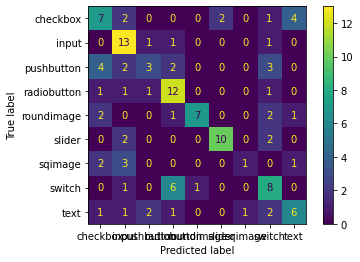

In [4]:
X=datasetorb50_df.drop(['target', 'filename'], axis=1)
y=datasetorb50_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11, stratify=y)

# Aprenda a clasificar el conjunto de entrenamiento
classifier.fit(X_train, y_train)
y_predicted = classifier.predict(X_test)
conf_mat=metrics.confusion_matrix(y_test, y_predicted)
metrics.plot_confusion_matrix(classifier, X_test, y_test)

In [5]:
print("Classification report for classifier {}\n{}\n".format(classifier, metrics.classification_report(y_test, y_predicted)))

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

    checkbox       0.41      0.44      0.42        16
       input       0.52      0.81      0.63        16
  pushbutton       0.43      0.21      0.29        14
 radiobutton       0.52      0.75      0.62        16
  roundimage       0.88      0.54      0.67        13
      slider       0.83      0.71      0.77        14
     sqimage       0.50      0.14      0.22         7
      switch       0.40      0.50      0.44        16
        text       0.50      0.43      0.46        14

    accuracy                           0.53       126
   macro avg       0.55      0.50      0.50       126
weighted avg       0.55      0.53      0.52       126




Como se puede observar en la tabla, los resultados están lejos de ser ideales. Se logra apenas una precisión promedio de 0.55.
Instintivamente uno podría pensar que se trata de un dataset con pocos keypoints, por lo que a continuación se repite el proceso para un dataset con 200 keypoints ORB.
###ORB con 200 keypoints
Cargamos el dataset. Este dataset tiene aún más columnas.

In [7]:
classifier = svm.LinearSVC()
with open("dataroot/dataset_img_ORB_200.pkl", "rb") as fh:
  datasetorb200_df = pickle.load(fh)
datasetorb200_df

,filename,target,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,12762,12763,12764,12765,12766,12767,12768,12769,12770,12771,12772,12773,12774,12775,12776,12777,12778,12779,12780,12781,12782,12783,12784,12785,12786,12787,12788,12789,12790,12791,12792,12793,12794,12795,12796,12797,12798,12799,12800,12801
0,tile018_p.png,checkbox,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,tile061_p.png,checkbox,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,tile040_p.png,checkbox,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,tile037_p.png,checkbox,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,...,False,True,False,True,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,True,True,True,False,False,True,True,False,False,True,False,False,False,False,True,False,True,True,False,False
4,tile049_p.png,checkbox,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,tile012_p.png,text,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,...,False,False,True,False,True,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False,True,True,True,True,False,True,True,False,False,False,True,False,False,True,False,False,False,True,False,False
415,tile019_p.png,text,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,

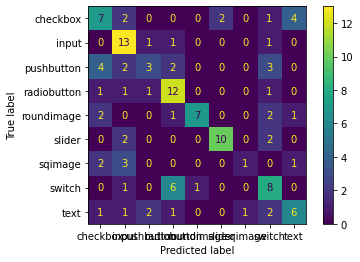

In [8]:
X=datasetorb200_df.drop(['target', 'filename'], axis=1)
y=datasetorb200_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11, stratify=y)

# Aprenda a clasificar el conjunto de entrenamiento
classifier.fit(X_train, y_train)
y_predicted = classifier.predict(X_test)
conf_mat=metrics.confusion_matrix(y_test, y_predicted)
metrics.plot_confusion_matrix(classifier, X_test, y_test)

In [9]:
print("Classification report for classifier {}\n{}\n".format(classifier, metrics.classification_report(y_test, y_predicted)))

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

    checkbox       0.41      0.44      0.42        16
       input       0.52      0.81      0.63        16
  pushbutton       0.43      0.21      0.29        14
 radiobutton       0.52      0.75      0.62        16
  roundimage       0.88      0.54      0.67        13
      slider       0.83      0.71      0.77        14
     sqimage       0.50      0.14      0.22         7
      switch       0.40      0.50      0.44        16
        text       0.50      0.43      0.46        14

    accuracy                           0.53       126
   macro avg       0.55      0.50      0.50       126
weighted avg       0.55      0.53      0.52       126




##Transformada de Hough con ángulos discretos
Una gran alternativa a utilizar ORB es la [transformada de Hough](https://en.wikipedia.org/wiki/Hough_transform). Esta técnica detecta la presencia de formas (en este caso líneas rectas) mediante un procesimiento de votación. Se obtienen las líneas dominantes, parametrizadas por su ángulo y largo. Luego se agregó un pequeño código que discretiza estos ángulos a un cierto intervalo entre -pi y pi. Se probó dividir dicho intervalo en 5, 7 y 13 partes. Luego se hace un recuento de cuantas líneas para cada ángulo discreto hay y se suman los largos en valor absoluto. De esta forma se tiene un dataset angosto pero con alta cantidad de información sobre las formas de cada dibujo. Estos datasets se generaron con el script [create_widget_dataset_hough.py](https://github.com/piltom/widget_sketch_recon/blob/main/create_widget_dataset_hough.py).

### Hough con 7 ángulos discretos
Empezamos por cargar el dataset. Nótese que sólo tiene 16 columnas, de las cuales 14 son features. Las columnas fueron normalizadas.

In [11]:
classifier = svm.LinearSVC()
with open("dataroot/dataset_img_hough7_fullsize.pkl", "rb") as fh:
  datasethough7f_df = pickle.load(fh)
datasethough7f_df

,filename,target,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,tile018_p.png,checkbox,0.125,0.0,0.047619,0.142857,0.1,0.000,0.375,0.208252,0.0,0.037594,0.136048,0.106304,0.000000,0.380792
1,tile061_p.png,checkbox,0.125,0.0,0.047619,0.142857,0.1,0.000,0.125,0.034466,0.0,0.052632,0.151856,0.109470,0.000000,0.153587
2,tile040_p.png,checkbox,0.125,0.0,0.000000,0.142857,0.1,0.000,0.125,0.096602,0.0,0.000000,0.142754,0.118438,0.000000,0.155082
3,tile037_p.png,checkbox,0.250,0.0,0.000000,0.071429,0.1,0.000,0.000,0.264078,0.0,0.000000,0.043353,0.105777,0.000000,0.000000
4,tile049_p.png,checkbox,0.625,0.0,0.000000,0.142857,0.1,0.000,0.000,0.666505,0.0,0.000000,0.134132,0.101556,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,tile012_p.png,text,0.000,0.0,0.000000,0.000000,0.0,0.000,0.125,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.112481
435,tile019_p.png,text,0.250,0.0,0.000000,0.000000,0.0,0.125,0.125,0.187379,0.0,0.000000,0.000000,0.000000,0.089614,0.096786
436,tile045_p.png,text,0.000,0.0,0.000000,0.000000,0.0,0.125,0.250,0.000000,0.0,0.000000,0.000000,0.000000,0.087080,0.205531
437,tile001_p.png,text,0.000,0.0,0.000000,0.000000,0.0,0.000,0.125,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.099028


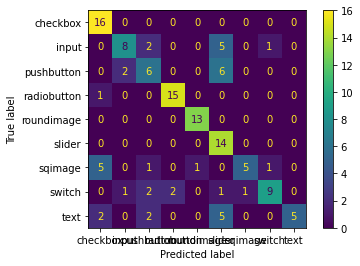

In [12]:
X=datasethough7f_df.drop(['target', 'filename'], axis=1)
y=datasethough7f_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11, stratify=y)

# Aprenda a clasificar el conjunto de entrenamiento
classifier.fit(X_train, y_train)
y_predicted = classifier.predict(X_test)
conf_mat=metrics.confusion_matrix(y_test, y_predicted)
metrics.plot_confusion_matrix(classifier, X_test, y_test)

In [13]:
print("Classification report for classifier {}\n{}\n".format(classifier, metrics.classification_report(y_test, y_predicted)))

Classification report for classifier LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

    checkbox       0.67      1.00      0.80        16
       input       0.73      0.50      0.59        16
  pushbutton       0.46      0.43      0.44        14
 radiobutton       0.88      0.94      0.91        16
  roundimage       0.93      1.00      0.96        13
      slider       0.45      1.00      0.62        14
     sqimage       0.83      0.38      0.53        13
      switch       0.82      0.56      0.67        16
        text       1.00      0.36      0.53        14

    accuracy                           0.69       132
   macro avg       0.75      0.69      0.67       132
weighted avg       0.75      0.69      0.68       132




Los resultaods obtenidos superan ampliamente a los obtenidos con ORB. Sin embargo, hay lugar para mejoras. En un principio, se podría probar si reducir la imagen de la cual se extraen las features mejora o empeora los resultados. Sería posible que los resultados mejoren en el caso de que líneas imperfectas se vuelvan más rectas.
###Hough con 7 ángulos discretos, imagen de 1/8 de tamaño
Para este dataset se achicaron las imágenes por ocho a lo largo y a lo ancho antes de extraer las features.
Cargamos el dataset:

In [14]:
classifier = svm.LinearSVC()
with open("dataroot/dataset_img_hough7_8thsize.pkl", "rb") as fh:
  datasethough7f_df = pickle.load(fh)
datasethough7f_df

,filename,target,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,tile018_p.png,checkbox,0.00,0.25,0.4,0.333333,0.50,0.666667,0.666667,0.000000,0.70,0.192183,0.431818,0.509804,0.705882,0.713178
1,tile061_p.png,checkbox,0.25,0.50,0.4,0.500000,0.25,0.000000,0.666667,0.080882,0.56,0.168160,0.573864,0.250000,0.000000,0.527132
2,tile040_p.png,checkbox,0.25,0.50,0.2,0.500000,0.25,0.333333,0.333333,0.227941,0.40,0.300285,0.585227,0.269608,0.462185,0.410853
3,tile037_p.png,checkbox,0.50,0.50,0.4,0.333333,0.50,0.333333,1.000000,0.367647,0.52,0.456434,0.352273,0.500000,0.428571,1.000000
4,tile049_p.png,checkbox,0.50,0.25,0.4,0.500000,0.50,0.000000,0.666667,0.397059,0.54,0.168160,0.619318,0.470588,0.000000,0.589147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,tile012_p.png,text,0.00,0.00,0.0,0.000000,0.00,0.000000,0.333333,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.302326
435,tile019_p.png,text,0.00,0.00,0.0,0.000000,0.00,0.000000,0.333333,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.255814
436,tile045_p.png,text,0.00,0.25,0.0,0.000000,0.00,0.333333,0.333333,0.000000,0.02,0.000000,0.000000,0.000000,0.294118,0.240310
437,tile001_p.png,text,0.00,0.00,0.0,0.000000,0.00,0.000000,0.333333,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.255814
